## MNIST 

In [145]:
import os
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
from matplotlib.pyplot import figure
from radam import *
import time

import matplotlib.pyplot as plt

In [146]:
root = './data'
if not os.path.exists(root):
    os.mkdir(root)

In [147]:
train_set = dset.MNIST(root=root, train=True, transform=transforms.ToTensor(), download=True)
test_set = dset.MNIST(root=root, train=False, transform=transforms.ToTensor(), download=True)

In [148]:
batch_size = 50
total_epoch = 80
learning_rate = 0.01
use_cuda = torch.cuda.is_available() 

In [149]:
train_loader = torch.utils.data.DataLoader( 
                 dataset=train_set,
                 batch_size=batch_size,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batch_size,
                shuffle=False)


## Model class
Simple classifier composed with 2 convolution layer and 1 linear layer

In [150]:
class p1CNN(nn.Module):
    def __init__(self):
        super(p1CNN, self).__init__()
        self.c1 = nn.Conv2d(1, 6, kernel_size=3, padding=1)
        self.c2 = nn.Conv2d(6, 1, kernel_size=3, padding=1)
        self.mp = nn.MaxPool2d(kernel_size=2)
        self.li = nn.Linear(7*7, 10)
    
    def forward(self, x):
        x = self.mp(F.relu(self.c1(x)))
        x = self.mp(F.relu(self.c2(x)))
        x = x.view(-1, 7*7)
        x = self.li(x)
        return x

def weights_init(m):
    classname = m.__class__.__name__
    for p in model.parameters():
        p.data.fill_(1)

        

## Model Assign

In [151]:
model1 = p1CNN().cuda()
model2 = p1CNN().cuda()
model3 = p1CNN().cuda()
model4 = p1CNN().cuda()
model5 = p1CNN().cuda()
model6 = p1CNN().cuda()
model7 = p1CNN().cuda()
model8 = p1CNN().cuda()
model9 = p1CNN().cuda()
tmp = p1CNN().cuda()
tmp.load_state_dict(model1.state_dict())
model2.load_state_dict(tmp.state_dict())
model3.load_state_dict(tmp.state_dict())
model4.load_state_dict(tmp.state_dict())
model5.load_state_dict(tmp.state_dict())
model6.load_state_dict(tmp.state_dict())
model7.load_state_dict(tmp.state_dict())
model8.load_state_dict(tmp.state_dict())
model9.load_state_dict(tmp.state_dict())

model_list = [model1, model2, model3, model4, model5, model6, model7, model8, model9]

## Optimizer Assign

In [152]:
optimizer1 = optim.Adam(model1.parameters(), lr=0.03)
optimizer2 = optim.Adam(model2.parameters(), lr=0.01)
optimizer3 = optim.Adam(model3.parameters(), lr=0.003)
optimizer4 = RAdam(model4.parameters(), lr=0.03)
optimizer5 = RAdam(model5.parameters(), lr=0.01)
optimizer6 = RAdam(model6.parameters(), lr=0.003)
optimizer7 = optim.SGD(model7.parameters(), lr=0.03)
optimizer8 = optim.SGD(model8.parameters(), lr=0.01)
optimizer9 = optim.SGD(model9.parameters(), lr=0.003)
criterion = nn.CrossEntropyLoss() # [Question 6] What is 'nn.CrossEntropyLoss' used for?
optim_list = [optimizer1, optimizer2, optimizer3, optimizer4, optimizer5, optimizer6, optimizer7, optimizer8, optimizer9] # , 

## Train 9 models 

In [153]:
train_loss_list, test_acc_list = [], []
for i in range(9):
    tmp1, tmp2 = [], []
    for j in range(80):
        tmp1.append(0)
        tmp2.append(0)
    train_loss_list.append(tmp1)
    test_acc_list.append(tmp2)

for epoch in range(total_epoch):
    # trainning
    for i, (model, optim) in enumerate(zip(model_list, optim_list)):
        if epoch == 0 and i == 0:
            start = time.time()

        total_loss = 0
        total_batch = 0
        for batch_idx, (x, target) in enumerate(train_loader):
            if use_cuda:
                x, target = x.cuda(), target.cuda()
            
            
                model.train()
                optim.zero_grad()

                out = model(x)
                loss = criterion(out, target)
                total_loss += loss.item()
                loss.backward()
                optim.step()
            total_batch += 1
        train_loss_list[i][epoch] = total_loss / total_batch
        print ('==>>> epoch: {}, batch index: {}, train loss: {:.6f}, {}'
                .format(epoch, batch_idx+1, total_loss / total_batch, total_batch))
    
    # testing
        total_loss = 0
        total_batch = 0
        correct_cnt = 0
        total_cnt = 0
    
        for batch_idx, (x, target) in enumerate(test_loader):
            model.eval()
            if use_cuda:
                x, target = x.cuda(), target.cuda()
                
            out = model(x)
            loss = criterion(out, target)
            _, pred_label = torch.max(out.data, 1)
            total_cnt += x.data.size()[0]
            correct_cnt += (pred_label == target.data).sum().item()
            
            total_loss += loss.item()
            total_batch += 1
        test_acc_list[i][epoch] = correct_cnt / total_cnt
        print ('==>>> epoch: {}, batch index: {}, test loss: {:.6f}, acc: {:.3f}'
                .format(epoch, batch_idx+1, total_loss / total_batch, correct_cnt * 1.0 / total_cnt))
        if epoch == 0 and i == 0:
            end = time.time()
            estimate = end - start
            total = estimate * 9 * total_epoch
            print(f'{total // 60} minute and {total % 60} sec left')


==>>> epoch: 183, batch index: 200, test loss: 0.215507, acc: 0.933
==>>> epoch: 183, batch index: 1200, train loss: 0.245251, 1200
==>>> epoch: 183, batch index: 200, test loss: 0.242526, acc: 0.925
==>>> epoch: 183, batch index: 1200, train loss: 0.182791, 1200
==>>> epoch: 183, batch index: 200, test loss: 0.178660, acc: 0.943
==>>> epoch: 183, batch index: 1200, train loss: 0.213932, 1200
==>>> epoch: 183, batch index: 200, test loss: 0.205223, acc: 0.937
==>>> epoch: 183, batch index: 1200, train loss: 0.245663, 1200
==>>> epoch: 183, batch index: 200, test loss: 0.240289, acc: 0.925
==>>> epoch: 183, batch index: 1200, train loss: 0.171491, 1200
==>>> epoch: 183, batch index: 200, test loss: 0.158848, acc: 0.949
==>>> epoch: 183, batch index: 1200, train loss: 0.319831, 1200
==>>> epoch: 183, batch index: 200, test loss: 0.316684, acc: 0.904
==>>> epoch: 183, batch index: 1200, train loss: 0.459189, 1200
==>>> epoch: 183, batch index: 200, test loss: 0.435507, acc: 0.868
==>>> ep

## Plot result, using subplot

Text(0.5, 0.98, 'Comparison of Adam, RAdam, SGD by train loss and test acc per epoch')

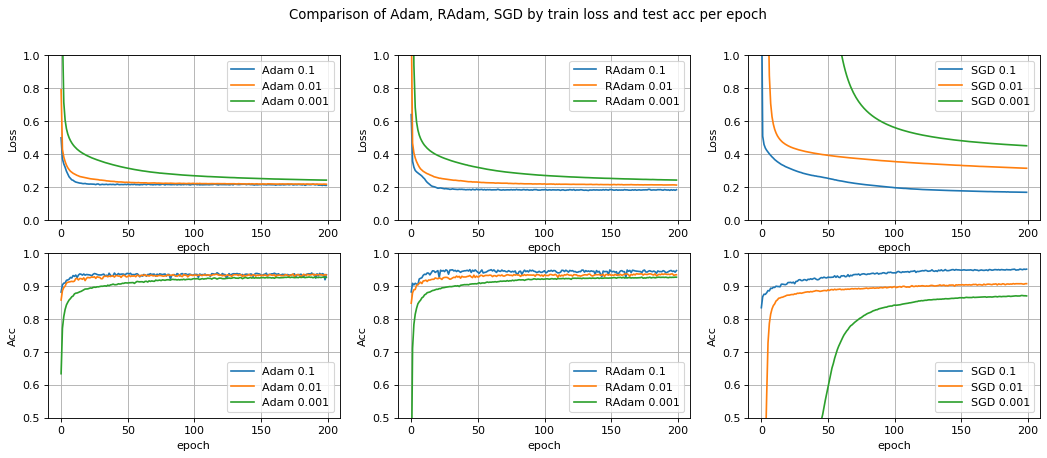

In [164]:
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(231)
for i in range(3):
    plt.plot(train_loss_list[i])

plt.legend(labels=('Adam 0.03', 'Adam 0.01', 'Adam 0.003'))
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.ylim(0, 1)
plt.subplot(234)
for i in range(3):
    plt.plot(test_acc_list[i])

plt.legend(labels=('Adam 0.03', 'Adam 0.01', 'Adam 0.003'))
plt.xlabel('epoch')
plt.ylabel('Acc')
plt.grid()
plt.ylim(0.5, 1)
plt.subplot(232)
for i in range(3):
    plt.plot(train_loss_list[i+3])

plt.legend(labels=('RAdam 0.03', 'RAdam 0.01', 'RAdam 0.003'))
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.ylim(0, 1)
plt.subplot(235)
for i in range(3):
    plt.plot(test_acc_list[i+3])

plt.legend(labels=('RAdam 0.03', 'RAdam 0.01', 'RAdam 0.003'))
plt.xlabel('epoch')
plt.ylabel('Acc')
plt.grid()
plt.ylim(0.5, 1)
plt.subplot(233)
for i in range(3):
    plt.plot(train_loss_list[i+6])

plt.legend(labels=('SGD 0.03', 'SGD 0.01', 'SGD 0.003'))
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.grid()
plt.ylim(0, 1)
plt.subplot(236)
for i in range(3):
    plt.plot(test_acc_list[i+6])

plt.legend(labels=('SGD 0.03', 'SGD 0.01', 'SGD 0.003'))
plt.xlabel('epoch')
plt.ylabel('Acc')
plt.grid()
plt.ylim(0.5, 1)

plt.suptitle('Comparison of Adam, RAdam, SGD by train loss and test acc per epoch')

## Plot only Adam

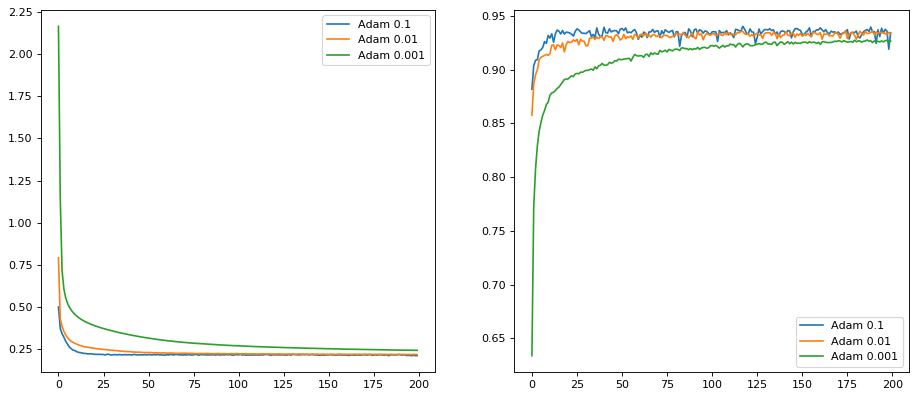

In [160]:
figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(121)
for i in range(3):
    plt.plot(train_loss_list[i])

plt.legend(labels=('Adam 0.1', 'Adam 0.01', 'Adam 0.001'))

plt.subplot(122)
for i in range(3):
    plt.plot(test_acc_list[i])

plt.legend(labels=('Adam 0.1', 'Adam 0.01', 'Adam 0.001'))



## Plot only RAdam

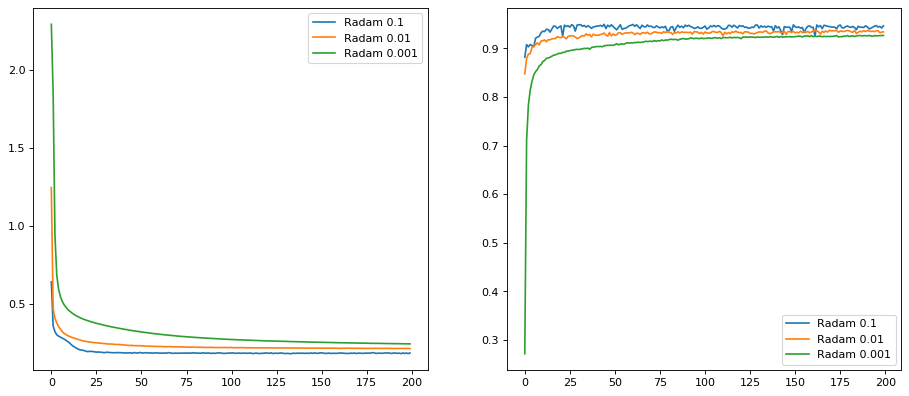

In [156]:
figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(121)
for i in range(3):
    plt.plot(train_loss_list[i+3])

plt.legend(labels=('Radam 0.1', 'Radam 0.01', 'Radam 0.001'))

plt.subplot(122)
for i in range(3):
    plt.plot(test_acc_list[i+3])

plt.legend(labels=('Radam 0.1', 'Radam 0.01', 'Radam 0.001'))



## Plot only SGD

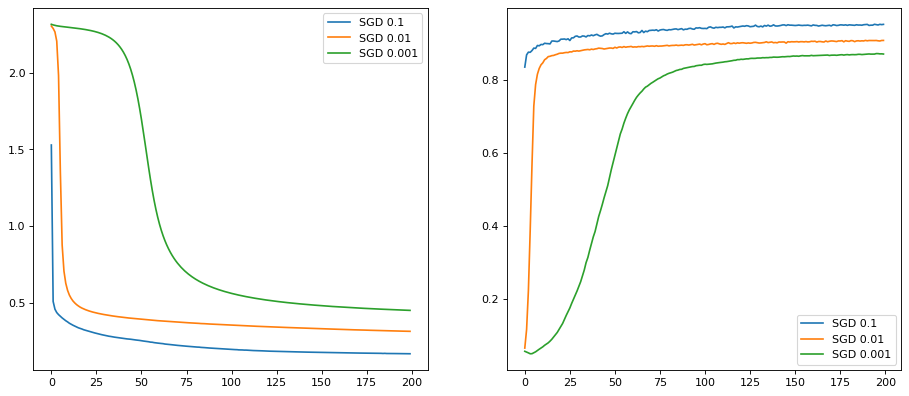

In [157]:
figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(121)
for i in range(3):
    plt.plot(train_loss_list[i+6])

plt.legend(labels=('SGD 0.1', 'SGD 0.01', 'SGD 0.001'))

plt.subplot(122)
for i in range(3):
    plt.plot(test_acc_list[i+6])

plt.legend(labels=('SGD 0.1', 'SGD 0.01', 'SGD 0.001'))